# Setup

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from google.colab import drive
import os

In [29]:
drive.mount("/content/drive", force_remount=True)
root = "/content/drive/My Drive/Horse Category Classification"
os.chdir(root)
data_root = root + "/data"
data_root_train = data_root + "/train"
data_root_test = data_root + "/test"

Mounted at /content/drive


In [30]:
os.chdir(root+ "/functions")
import exploration

# 00 Data Collection

The data has been collected from various data sources (kaggle, own photographs, general google image search) and manually labelled, then it was split into the three datasets (train, val and test) and uploaded to the drive.

# 01 Data Exploration

### Load Data

In [31]:
BATCH_SIZE = 32
HEIGHT = 224
WIDTH = 224

In [32]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_root_train,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(HEIGHT, WIDTH),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
    crop_to_aspect_ratio=False
)

Found 477 files belonging to 3 classes.
Using 382 files for training.


In [33]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_root_train,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(HEIGHT, WIDTH),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
    crop_to_aspect_ratio=False
)

Found 477 files belonging to 3 classes.
Using 95 files for validation.


In [34]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_root_test,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(HEIGHT, WIDTH),
    shuffle=False,
)

Found 117 files belonging to 3 classes.


### Class Distribution

In [35]:
class_names = test_ds.class_names
CLASS_NAMES = class_names
num_classes = len(class_names)

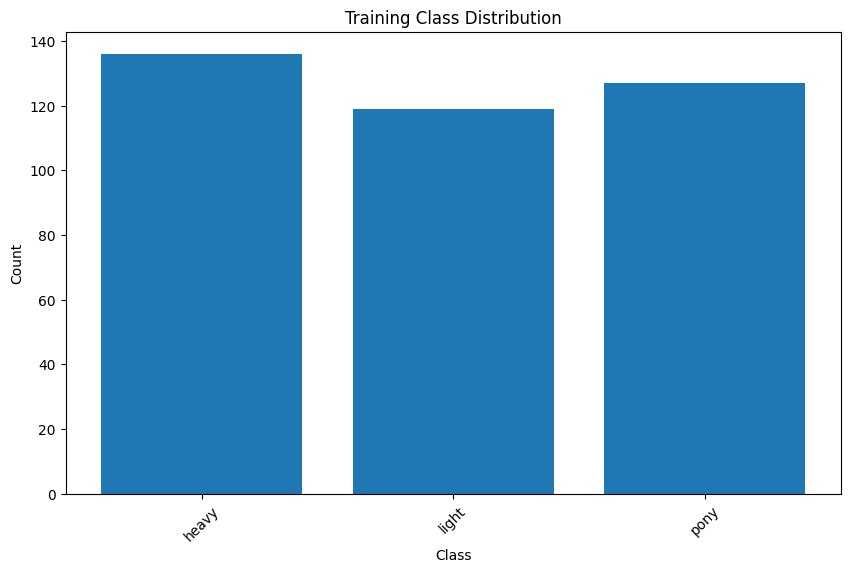

In [36]:
# train distribution
exploration.print_distribution("Training Class Distribution", class_names, train_ds)

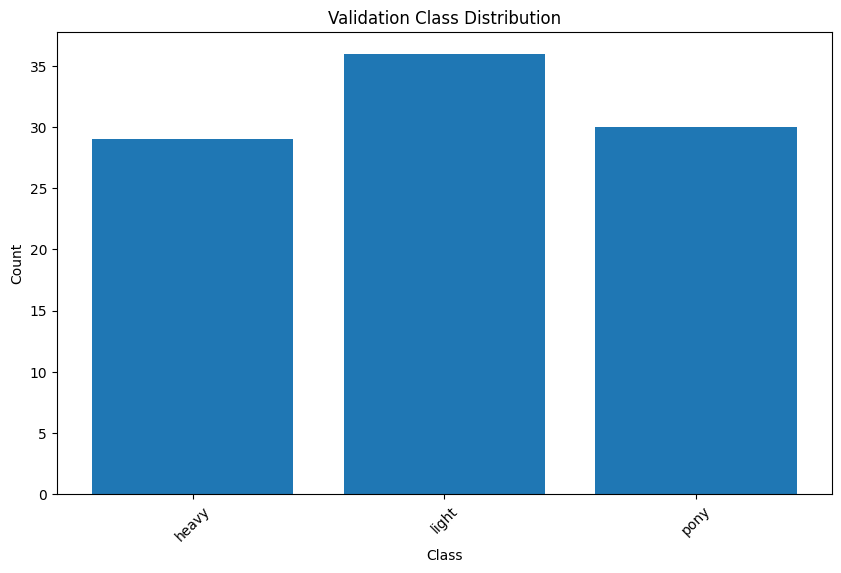

In [37]:
# val distribution
exploration.print_distribution("Validation Class Distribution", class_names, val_ds)

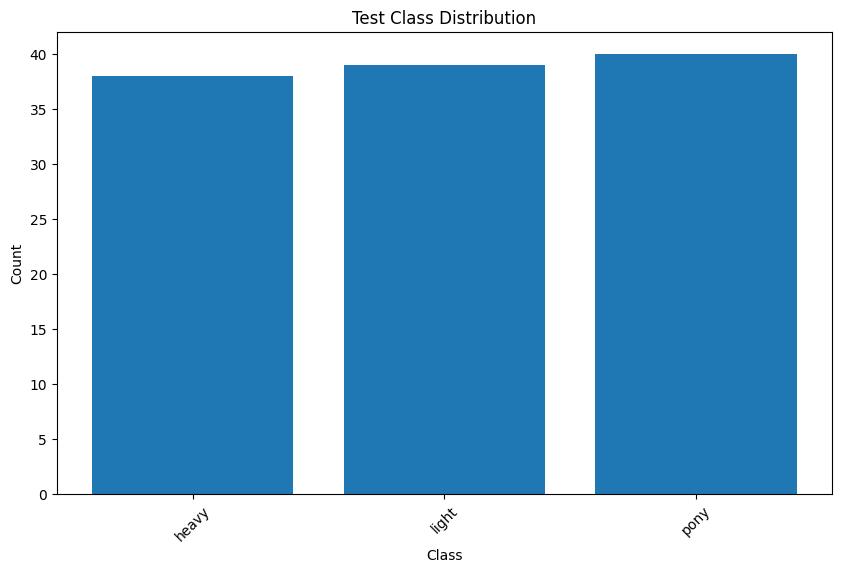

In [38]:
# test distribution
exploration.print_distribution("Test Class Distribution", class_names, test_ds)

### Sneakpeek

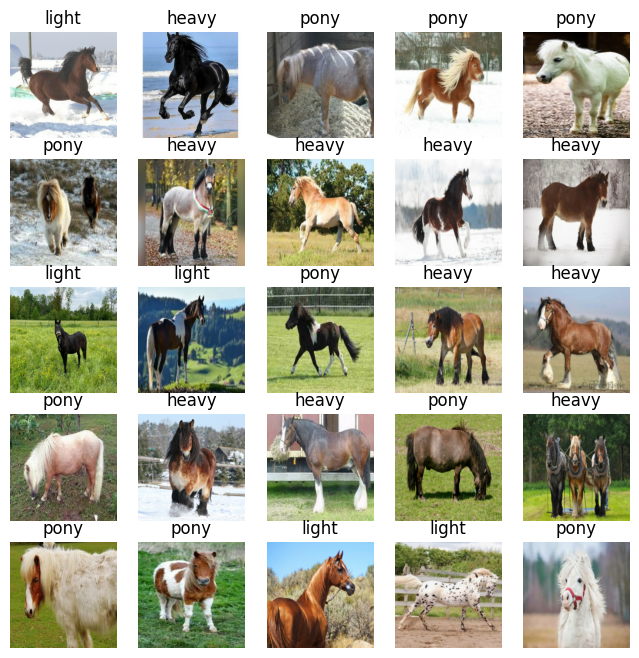

In [39]:
# looking at the training set
exploration.sneak_peek(train_ds, class_names)

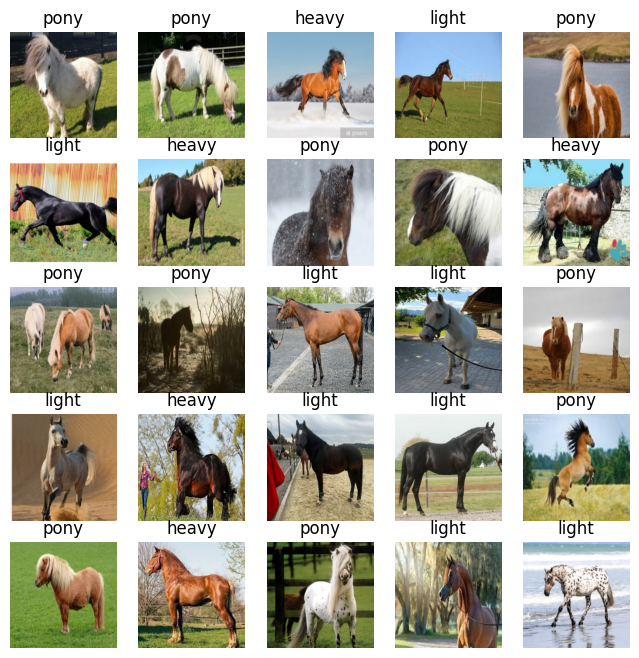

In [40]:
# looking at the validation set
exploration.sneak_peek(val_ds, class_names)

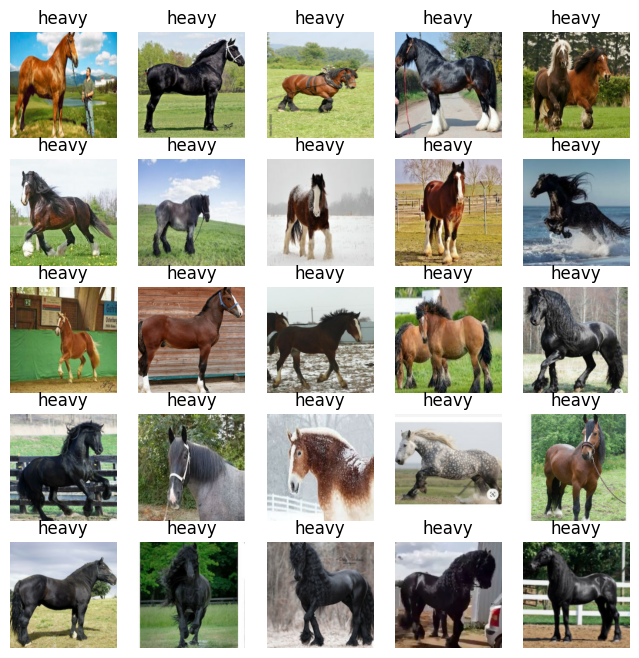

In [41]:
# looking at the test set (shuffling is not active, therefore all from the same category)

exploration.sneak_peek(test_ds, class_names)

### Summary


- The data looks sufficiently balanced
- The dataset sizes are as expected
- The previews of the pictures show that they are correctly loaded with their label

